Please run the cell below to set up the environment.

In [2]:
#Keep cell
import os

if not(os.path.exists('114_congress.csv')):
  print('Downloading 114_congress.csv\n')
  !wget https://raw.githubusercontent.com/goto4711/cdai/main/114_congress.csv

if not(os.path.exists('winequality-red.csv')):
  print('Downloading winequality-red.csv\n')
  !wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

if not(os.path.exists('winequality-white.csv')):
  print('Downloading winequality-white.csv\n')
  !wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv


--2024-11-28 17:56:17--  https://raw.githubusercontent.com/goto4711/cdai/main/114_congress.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3773 (3.7K) [text/plain]
Saving to: ‘114_congress.csv’

114_congress.csv    100%[===================>]   3.68K  --.-KB/s    in 0s      

2024-11-28 17:56:17 (30.9 MB/s) - ‘114_congress.csv’ saved [3773/3773]


--2024-11-28 17:56:17--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>          

# Machine Learning

In today's workshop, we focus on introducing real-life social and cultural datasets, which often lack the quality to be processed easily. The kind of social and cultural data we are dealing with is vast and unorganized, which makes organizing it for analysis no easy task. In reality, you will spend most of your time on working through such data challenges.

We start by exploring political and social community data using clustering. It is very effective and easy to use. We will gain some real insights about US politics as well as communities in social networking sites. Next to this unsupervised learning task, we will go more into the details of particular supervised learning that is widely used in the second part of the workshop.

First load all the standard Pandas, etc. Python libraries, which should be familiar to you.

Run the cell below.

In [3]:
#Keep cell

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Unsupervised Machine Learning with Clustering

In the first part, we dig deeper into digital methodologies and data exploration using a particular method called clustering, which is closely related to the understanding of political and social communities. We rely on our trusted k-means clustering to explore political voting behaviour.

As a reminder, k-means tries to develop clusters by
1. initialising a pre-defined number (k) of randomly chosen centroids in the feature space. Centroids are simply the centre points of clusters.
1. The algorithm assigns each observation to the cluster with the closest centroid.
1. Based on how balanced this assignment is, the centroids are recalculated and steps 1 and 2 are repeated until the algorithm balances out.

We will use k-means to understand voting behaviour in the US senate. We chose a time when the Senate was not too partisan, as we would like to investigate changing voting behaviour. The data is a subset of the data from https://www.dataquest.io/blog/k-means-clustering-us-senators/.

Please, run the cell below to create the congress_114 data frame, which contains the voting behaviour of 114th US Senate. According to Wikipedia (https://en.wikipedia.org/wiki/114th_United_States_Congress), the 114th Congress met in Washington, D.C. from 3 January 2015 to 3 January 2017, during the final two years of Barack Obama's presidency.

The 2014 elections gave the Republicans control of the Senate and control of both houses of Congress for the first time since the 109th Congress. With 247 seats in the House of Representatives and 54 seats in the Senate, this Congress began with the largest Republican majority since the 71st Congress of 1929-1931. There are 23 Democrats, 1 Independent and 33 Republicans in our dataset. As said, this does not represent the full 114th congress but a sample.

Run the cell below.

In [4]:
#Keep cell

congress_114 = pd.read_csv("114_congress.csv")

### Data Preparation (15 points)

To warm up, please check the first five entries of the dataset. It contains the name of a particular senator, their party and home state as well as for each bill whether the senator voted for the bill (1) or against it (0). Check out the first 5 rows of `congress_114` with `head()`.

In [5]:
#1 pt
congress_114.head()

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
0,0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Next check the last five records. You know how of course ...

You will see that the last record contains lots of NaN values, which stand in Python for missing values. This is the voting record of a senator who was not able to vote. In real-life datasets, you will see quite a few of these kinds of records - maybe because they never existed or they were not recorded in the first place, etc.

In [6]:
#2 pts
congress_114.tail()


,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
53,53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
54,54,Leahy,D,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
55,55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
56,56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
57,57,Markey,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we have already learned, there are many strategies to deal with these kinds of missing records or 'dirty' data. Here, we will use the brute-force version and simply remove it from the dataset. It is only one record and is completely missing. So, removing these records should be safe.

First check that there is really only one record by displaying all null entries in the dataset. Run `congress_114[congress_114.isnull().any(axis=1)]`. `isnull()` checks for NaN entries and any(axis=1) applies this to all columns.

In [7]:
#1 pt
congress_114[congress_114.isnull().any(axis=1)]

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
57,57,Markey,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's only one record missing, and the person has not voted at all. This makes us confident that we can just delete them ...

Remove the record. The easiest is to simply remove all the records with NaN values. Pandas has a function for that. Type in `congress_114 = congress_114.dropna()`.

In [8]:
congress_114 = congress_114.dropna()

Check the last 5 elements again to make sure that the observation with NaN values (of the senator who missed votes) is really gone.

In [9]:
#2 pts
congress_114.tail()

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
52,52,Klobuchar,D,MN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
53,53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
54,54,Leahy,D,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
55,55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
56,56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


Try to get a quick overview of the dataset and 'describe' it with `congress_114.describe()`.

In [10]:
congress_114.describe()

,index,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000,57.000000
mean,28.000000,0.263158,0.614035,0.561404,0.947368,0.578947,0.385965,0.578947,1.0,0.543860,0.578947,0.368421,0.45614,0.526316,0.438596,0.315789
std,16.598193,0.434097,0.491150,0.500626,0.225282,0.498117,0.491150,0.498117,0.0,0.493536,0.479857,0.486664,0.50250,0.503745,0.500626,0.468961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,42.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


This has not produced very useful outputs. Check the column types with `congress_114.dtypes` to undestand why ...

In [11]:
congress_114.dtypes

,0
index,int64
name,object
party,object
state,object
bill-1,float64
bill-4,float64
bill-5,float64
bill-6,float64
bill-7,float64
bill-8,float64


1 and 0s or object strings obviously do not produce sensible means or stds ... They are not numbers and have no average.

Finally, check how many democrats, republicans and independents are in `congress_114`. Type in `congress_114.iloc[:,2].value_counts()` to select column 3 with iloc and apply `value_counts()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [12]:
#1 pt
congress_114.iloc[:,2].value_counts()

,count
party,
R,33
D,23
I,1


Let's run a test  to see whether we got everything right up to now.

In [13]:
# Run this cell to test your code...
assert congress_114.iloc[:,2].value_counts().sum() > 55, f'Test failed'
print('All tests passed!')

All tests passed!


We want to improve the content of the dataframe next and make the types fit better. To this end, we change the float types to integers.

This is actually quite hard work in Pandas. You need to first select the right columns in the dataframe. You could just count the column numbers, as it is a very small dataframe. But you could also use the Pandas function `select_dtypes(['float'])` to select only the right columns, because the bills columns are the only float columns. Run the following

```
bill_cols = list(congress_114.select_dtypes(['float']).columns)
bill_cols
```
We call them `bill_cols` as only the bills are `float` in `congress_114.dtypes`.

In [14]:
#1 pt
bill_cols =  list(congress_114.select_dtypes(['float']).columns)
bill_cols


['bill-1',
 'bill-4',
 'bill-5',
 'bill-6',
 'bill-7',
 'bill-8',
 'bill-9',
 'bill-10',
 'bill-20',
 'bill-26',
 'bill-32',
 'bill-38',
 'bill-39',
 'bill-44',
 'bill-47']

With the Pandas loc function and bill_cols, you can select all the bill columns. Make them all integer columns with astype(int): `congress_114[bill_cols] = congress_114[bill_cols].astype(int)`.

In [15]:
congress_114[bill_cols] = congress_114[bill_cols].astype(int)


Check that everything has come out as planned by checking dtypes.

BTW, you will have noticed that string types are objects in Pandas ...

In [16]:
#2 pts
congress_114.dtypes

,0
index,int64
name,object
party,object
state,object
bill-1,int64
bill-4,int64
bill-5,int64
bill-6,int64
bill-7,int64
bill-8,int64


Let's run a test that we got it all right.

In [17]:
# Run this cell to test your code...
assert list(congress_114.dtypes.value_counts().items())[0][1]>=15, f'Test failed'
print('All tests passed!')

All tests passed!


Now, let's see whether Gemini can do the same. Run the cell below to create another dataframe `congress_114_gemini` with the 114_congress dataset.

In [18]:
#Keep cell

congress_114_gemini = pd.read_csv("114_congress.csv")
print(congress_114_gemini.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    58 non-null     int64  
 1   name     58 non-null     object 
 2   party    58 non-null     object 
 3   state    57 non-null     object 
 4   bill-1   57 non-null     float64
 5   bill-4   57 non-null     float64
 6   bill-5   57 non-null     float64
 7   bill-6   57 non-null     float64
 8   bill-7   57 non-null     float64
 9   bill-8   57 non-null     float64
 10  bill-9   57 non-null     float64
 11  bill-10  57 non-null     float64
 12  bill-20  57 non-null     float64
 13  bill-26  57 non-null     float64
 14  bill-32  57 non-null     float64
 15  bill-38  57 non-null     float64
 16  bill-39  57 non-null     float64
 17  bill-44  57 non-null     float64
 18  bill-47  57 non-null     float64
dtypes: float64(15), int64(1), object(3)
memory usage: 8.7+ KB
None


Can you write a prompt that removes all rows with NaN values from `congress_114_gemini` and transforms float columns to integer?

In [19]:
#5 pts
congress_114_gemini = congress_114_gemini.dropna()
congress_114_gemini[bill_cols] = congress_114_gemini[bill_cols].astype(int)

Run the cell below to see the results.

In [20]:
#Keep cell
congress_114_gemini.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 56
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    57 non-null     int64 
 1   name     57 non-null     object
 2   party    57 non-null     object
 3   state    57 non-null     object
 4   bill-1   57 non-null     int64 
 5   bill-4   57 non-null     int64 
 6   bill-5   57 non-null     int64 
 7   bill-6   57 non-null     int64 
 8   bill-7   57 non-null     int64 
 9   bill-8   57 non-null     int64 
 10  bill-9   57 non-null     int64 
 11  bill-10  57 non-null     int64 
 12  bill-20  57 non-null     int64 
 13  bill-26  57 non-null     int64 
 14  bill-32  57 non-null     int64 
 15  bill-38  57 non-null     int64 
 16  bill-39  57 non-null     int64 
 17  bill-44  57 non-null     int64 
 18  bill-47  57 non-null     int64 
dtypes: int64(16), object(3)
memory usage: 8.9+ KB


### Clustering with k-means (15 points)

Let's practice clustering again with k-means. In order to find a good starting point for k, we can use our own knowledge about how the US senate is structured. We would like to investigate voting clusters, and we know that the US senate is dominated by 2 major parties. So, it seems like a good idea to start with two clusters (k = 2), as we can assume that there should be two major party-based voting clusters. Please, assign `k = 2`.

Run the cell below.

In [21]:
#Keep cell

k = 2

Next, we need to understand what we would like to cluster and choose the relevant features as inputs into the k-means algorithm. If you look back into your earlier explorations of the dataset, you can see that the first 4 columns do not contain voting behaviour. They have the name, state, etc. of the various senators. The voting behaviour can be found in columns 5 to 19. Use either the column indexes or `bill_cols` to create a new dataframe congress_114_voting, which only contains the voting behaviour.  Also, print out the first couple of rows of congress_114_voting.

In [22]:
#3 pts
bill_cols = list(congress_114.select_dtypes(['float']).columns)
congress_114_voting = congress_114.iloc[:, 4:]
congress_114_voting.head()

,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,1,0,1,0,1,0,0,1,1,0,1,1
3,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0


Great, we are ready to cluster the votes. Check out the details of k-means in the `sklearn` documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Its main arguments are the dataset to cluster and the number of clusters. We can leave all the other inputs at their defaults.

First `import KMeans` from `sklearn.cluster` by running the cell below.

In [23]:
#Keep cell

from sklearn.cluster import KMeans

Now, run KMeans and fit it with `n_clusters = k`. Check the documentation and you will find that it is:
```
kmeans = KMeans(n_clusters = k)
kmeans.fit(congress_114_voting)
```

In [24]:
kmeans = KMeans(n_clusters = k)
kmeans.fit(congress_114_voting)

KMeans(n_clusters=2)

This should not have taken too long, as the dataset is very small.

K-means is a fairly simply machine-learning algorithm, but still a standard example of an unsupervised machine learning algorithm. Unsupervised machine learning means that you do not have to train the computer in advance about the kind of results you expect.

Check why this was so quick by printing the number of iterations required to converge. Check the documentation and you will see that you need `kmeans.n_iter_`. Run the cell below.

In [25]:
#Keep cell
kmeans.n_iter_

2

Let's run a test.

In [26]:
# Run this cell to test your code...
assert kmeans.n_iter_ >= 2, f'Test failed'
print('All tests passed!')

All tests passed!


This is just one of the many pieces of information we can find in `kmeans`. The cluster assignments are stored as a one-dimensional NumPy array in `kmeans.labels_`. Here is a look at the first five predicted labels. Run the cell below.

In [27]:
#Keep cell

kmeans.labels_[:5]

array([0, 0, 1, 0, 1], dtype=int32)

Ok, so now that we have run our machine learning algorithms, what do we do with the results? A good first step for k-means and other clustering algorithms is to check out the size of the clusters. Who do you expect to belong to each cluster?

Use np.bincount with kmeans.labels_, please, and run `np.bincount(kmeans.labels_)`.

In [28]:
#1 pt
np.bincount(kmeans.labels_)

array([35, 22])

These numbers show that there is not really a clear division between Republicans and Democrats, as the clusters do not correspond to the numbers each party has in the senate.

Create a new dataframe `congress_114_result`, which contains the first 4 columns of `congress_114` as well as the cluster assignments for each senator by k-means. Take a moment to reflect what we gain from such a new dataframe?

Type in:
```
congress_114_result = congress_114.iloc[:, :4].copy()
congress_114_result["cluster"] = pd.Series(kmeans.labels_)
```
With `:4`, we select the first four columns. With `copy()`, we make a copy to keep the original dataframe.

In [29]:
#1 pt
congress_114_result = congress_114.iloc[:, :4].copy()
congress_114_result["cluster"] = pd.Series(kmeans.labels_)

Because we like it tidy, we give the columns of `congress_114_result` new readable names. We can do this by assigning the columns directly to a list of names: `congress_114_result.columns = ['index','name','party', 'state', 'cluster']`.

In [30]:
#1 pt
congress_114_result.columns = ['index','name','party', 'state', 'cluster']

Let's take a look at the composition of `congress_114_result` and print out the whole dataframe. What do you see?

In [31]:
congress_114_result

,index,name,party,state,cluster
0,0,Alexander,R,TN,0
1,1,Ayotte,R,NH,0
2,2,Baldwin,D,WI,1
3,3,Barrasso,R,WY,0
4,4,Bennet,D,CO,1
5,5,Blumenthal,D,CT,1
6,6,Blunt,R,MO,0
7,7,Booker,D,NJ,1
8,8,Boozman,R,AR,0
9,9,Boxer,D,CA,1


Finally, let's take a look at the composition of our 2 clusters.

In this case, we want to count how often a Democrat appears in cluster 1 or how often in cluster 2; similarly, how often is a Republican part of either cluster 1 or 2. Please note that there are also Independent senators.

In order to compare party and cluster features, use `pd.crosstab`: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html. With the crosstab function, we can count the frequency of the combination of two columns. Simply run: `pd.crosstab(congress_114_result['party'], congress_114_result['cluster'])`.

In [32]:
#1 pt
pd.crosstab(congress_114_result['party'], congress_114_result['cluster'])

cluster,0,1
party,,
D,2,21
I,0,1
R,33,0


Take a minute to interpret the results. Which party is more coherent in its voting behaviour? Can you identify the outliers by looking through the result data frame?

k = 2 seems to have been a fairly good choice for kmeans, as there is a lot of overlap between parties and voting clusters.

Let’s try k = 5 next to get more diversified results with 5 clusters.

Run the cell below.

In [33]:
#Keep cell

k = 5

Fit k-means with the new k. Assign it to `kmeans_5`. Check out the earlier code for fitting k-means with `k=2`. Simply copy it and run the cell.

In [34]:
#3 pts
kmeans_5 = KMeans(n_clusters=k)  # k is already set to 5
kmeans_5.fit(congress_114_voting)


KMeans(n_clusters=5)

As we already have a `congress_114_result` dataframe, we just need to create a new column in it with the new data. Create a new column cluster_5 with `congress_114_result["cluster_5"] = np.array(kmeans_5.labels_)`

In [35]:
congress_114_result["cluster_5"] = np.array(kmeans_5.labels_)

Let's run a quick test that everything looks ok. We cannot really verify the results as they are different for all of us, but the test at least checks whether we are on the right way.

In [36]:
# Run this cell to test your code...
assert len(np.unique(np.unique(kmeans_5.labels_))) == 5, f'Test failed'
print('All tests passed!')

All tests passed!


Let's run `congress_114_result` to check the results.

In [37]:
congress_114_result

,index,name,party,state,cluster,cluster_5
0,0,Alexander,R,TN,0,1
1,1,Ayotte,R,NH,0,4
2,2,Baldwin,D,WI,1,3
3,3,Barrasso,R,WY,0,1
4,4,Bennet,D,CO,1,0
5,5,Blumenthal,D,CT,1,3
6,6,Blunt,R,MO,0,1
7,7,Booker,D,NJ,1,3
8,8,Boozman,R,AR,0,1
9,9,Boxer,D,CA,1,3


Now, let's compare voting behaviour and parties again with `crosstab`. Can you change the earlier cell to compare `congress_114_result.cluster_5`?

In [38]:
#2 pts
pd.crosstab(congress_114_result['party'], congress_114_result['cluster_5'])

cluster_5,0,1,2,3,4
party,,,,,
D,4,0,2,17,0
I,0,0,0,1,0
R,0,31,0,0,2


There is at least one strange outlier in the clusters with regard to voting behaviour of particular Republicans. Let’s investigate those Republicans who appear not to vote with the rest of their party or other Democrats.

The cluster number will change depending on the result of your k-means. So, anything between 1 and 5. You get this number from the table you have just printed out. Use it to filter congress_114_result and retrieve the names and states of the senators. So, for instance, in my current run the two Republicans were in cluser 2. So, I run:
```
clusters_of_interest = [2]
congress_114_result.loc[congress_114_result['cluster_5'].isin(clusters_of_interest), ['name', 'state']]
```
`isin()` is a function to check whether something is part of a list. You must replace 2 in clusters_of_interest = [2] with your cluster number.

In [39]:
#3 pts
clusters_of_interest = [2]
congress_114_result.loc[congress_114_result['cluster_5'].isin(clusters_of_interest), ['name', 'state']]

,name,state
42,Heitkamp,ND
56,Manchin,WV


### Visualisation (10 points)

Finally we want to also visualise the cluster assignment to present how senators are close to each other in 2-dimensional coordinate system.

Create a simple visualisation that maps the 5 clusters in 2 dimensions and colour the points that represent the senators according to their 5 k-means clusters.

You need the principal component analysis (PCA) trick to map the 5 dimenions of `congress_114_voting` into 2 dimensions. It is explained here: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python.

First load PCA from sklearn with `from sklearn.decomposition import PCA`.

In [40]:
#2 pts
from sklearn.decomposition import PCA

First apply a PCA with two components.

Then, create a new dataframe principal_df with the results of this analysis and name the two columns PC_1 and PC2.

Finally, add the columns name, party, cluster and cluster_5 to principal_df. Run:

```
pca = PCA(n_components=2)

principal_components = pca.fit_transform(congress_114_voting)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC_1', 'PC_2'])

principal_df['name'] = congress_114_result.name
principal_df['party'] = congress_114_result.party
principal_df['cluster'] = congress_114_result.cluster
principal_df['cluster_5'] = congress_114_result.cluster_5
```

In [41]:
#3 pts
pca = PCA(n_components=2)

principal_components = pca.fit_transform(congress_114_voting)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC_1', 'PC_2'])

principal_df['name'] = congress_114_result.name
principal_df['party'] = congress_114_result.party
principal_df['cluster'] = congress_114_result.cluster
principal_df['cluster_5'] = congress_114_result.cluster_5

Run the code below to visualise. Do you understand what it is doing?

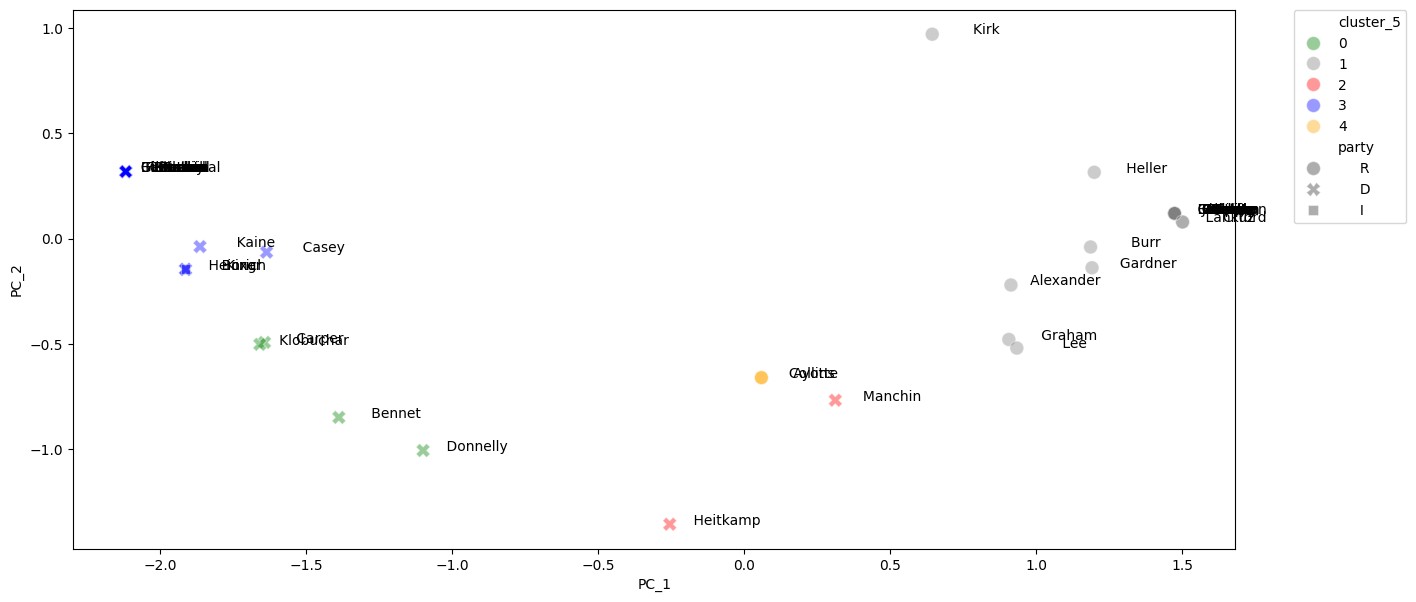

In [42]:
#Keep cell
#based on https://honingds.com/blog/seaborn-scatterplot/

import seaborn as sns
plt.figure(figsize=(15,7))

sns.scatterplot(data = principal_df, x='PC_1', y='PC_2', hue='cluster_5',
                style='party', s=100, palette=['green','grey','red','blue','orange'], alpha=.40)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(principal_df.PC_1, principal_df.PC_2, principal_df.name, plt.gca())


Take some time now and investigate which senators are the outliers are by researching them online. WIkipedia is enough. Can you understand why they are clusters by themselves?

Let's ask Gemini to do the PCA for congress_114_voting with two dimensions and visualise the data.

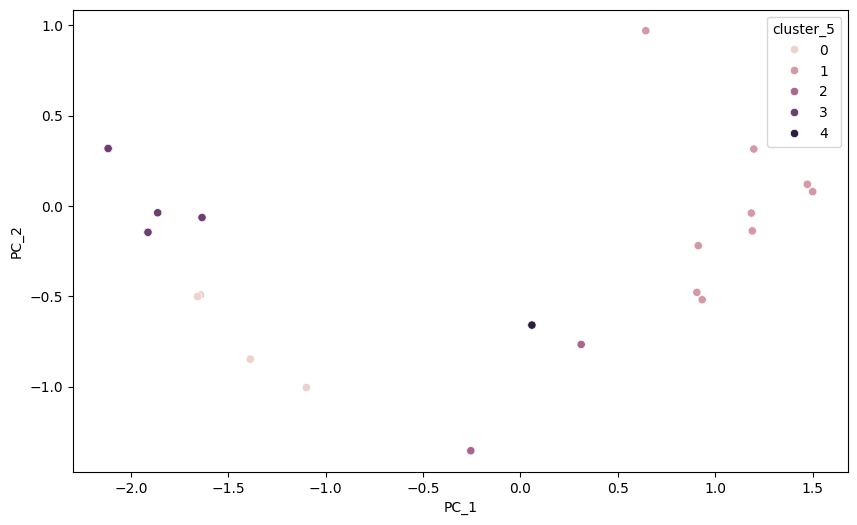

In [43]:
#5 pts
# Assuming congress_114_voting is already defined from your previous code

# Apply PCA with two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(congress_114_voting)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC_1', 'PC_2'])

# Add cluster assignments to the DataFrame (assuming kmeans_5 is already fit)
principal_df['cluster_5'] = kmeans_5.labels_

# Visualize the data using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_5', data=principal_df)
plt.show()


Nice. Can you update the generated code to add the names of the senators to the dots in the graph?

Bonus: Go online and research how to interpret PCA graphs with two dimensions? There are some common pitfalls to avoid ...

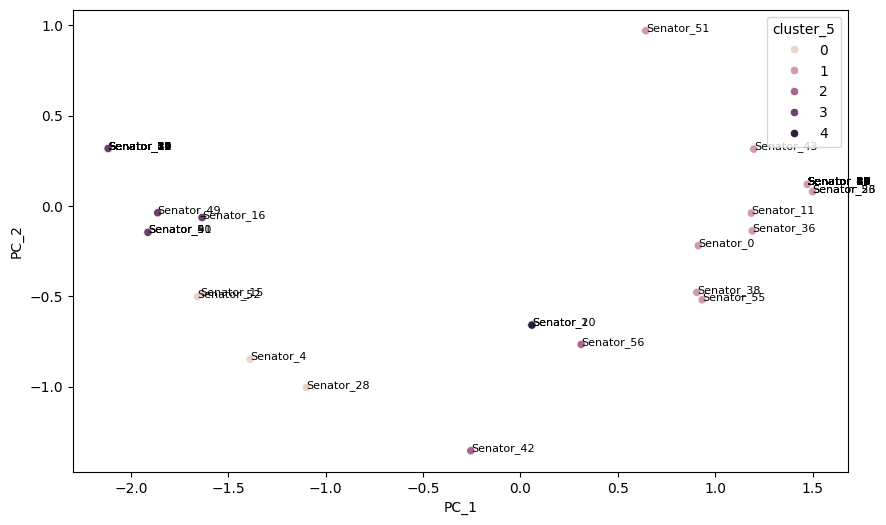

In [44]:

# Assuming principal_df and a DataFrame containing senator names are already defined

principal_df = pd.DataFrame(data=principal_components, columns=['PC_1', 'PC_2'])
principal_df['cluster_5'] = kmeans_5.labels_

senator_data = pd.DataFrame({'name': ['Senator_' + str(i) for i in range(principal_df.shape[0])]},
                             index=principal_df.index)


# Using the parameter to specifiy we are merging on the index
principal_df = pd.merge(principal_df, senator_data[['name']], left_index=True, right_index=True, on=None)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_5', data=principal_df)


# Assuming 'principal_df' now has a 'name' column after the merge
for i, row in principal_df.iterrows():
    plt.annotate(row['name'], (row['PC_1'], row['PC_2']), fontsize=8)

plt.show()

### Determine the optimal number of parties in the Senate according to k-means (10 points)

So what would be the optimal number of parties in the senate? In terms of k-means, we need to determine the optimal k. There are quite a few methods to estimate k. Among the best known is the elbow method that is based on visualing trials with several k's: https://pythonprogramminglanguage.com/kmeans-elbow-method/.

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster 'Sum of Squared Errors' (SSE; also called 'distortion') will decrease. SSE is the sum of the squared differences between each observation and its group's mean: https://hlab.stanford.edu/brian/error_sum_of_squares.html.

The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k.

To perform the elbow method, run several k-means, increment k with each iteration until you reach max_k = 10, and record the SSE-score in a list called sse. Then, map the SSE for each iteration to find the point for curve bends, the elbow. This will be the best k.

You could try this yourself, ask Gemini, or simply run the cells below. Don't forget to try and understand the code. You should recognize most of its components?

In [45]:
#Keep cell

max_k = 10
sse = []

for k in range(1, max_k):
    kmeans_ = KMeans(n_clusters = k)
    kmeans_.fit(congress_114_voting)
    sse.append(kmeans_.inertia_)

Run the code below to visualise the elbow ...

<Axes: xlabel='Number of Clusters', ylabel='SSE'>

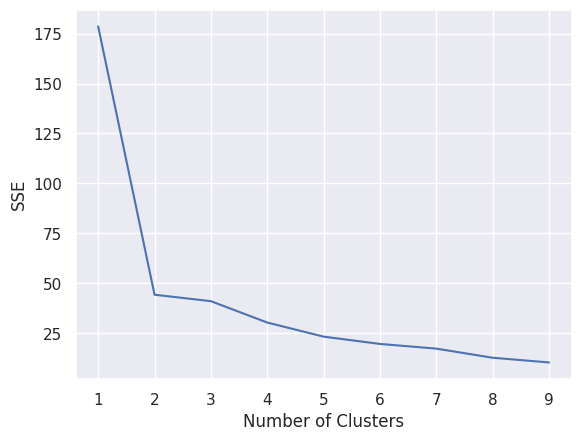

In [46]:
#Keep cell
sns.set(style='darkgrid')

elbow_df  = pd.DataFrame(list(zip(range(1, max_k), sse)),
              columns = ['Number of Clusters', 'SSE'])


sns.lineplot(x = 'Number of Clusters', y = 'SSE', data = elbow_df)

As you can see 2 is already the best answer ...

You can now continue playing with different k values if you want.

Before we move on, please finally consider https://www.r-bloggers.com/k-means-clustering-is-not-a-free-lunch/.

The article describes that, while clustering (and other machine learning algorithms) can produce very persuasive results, these do not come for free. They are no free lunch. The results always depend on the assumptions we add like the number of clusters in k-means but also how we describe the vote in the US Congress, how we measure somebody's influence, etc. This is the famous 'No Free Lunch Theorem' in machine learning.

The theorem also applies to supervised machine learning, which we will practice again for the rest of the workshop.

But first ask Gemini to create an elbow graph for k-means with `congress_114_voting`.

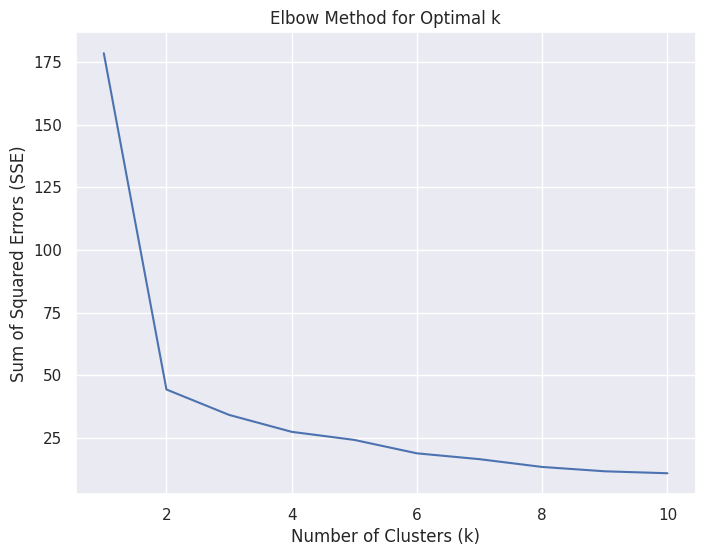

In [47]:
#10 pts
# Assuming congress_114_voting is already defined from your previous code


max_k = 10
sse = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with current k
    kmeans.fit(congress_114_voting)  # Fit KMeans to the data
    sse.append(kmeans.inertia_)  # Append the SSE to the list


# Create the elbow plot using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, max_k + 1), y=sse)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


## Supervised Machine Learning

In the lecture, we have seen how we can use a neural net to predict wine quality. However, for structured, tabular data (i.e., data that looks like spreadsheets or database tables; https://en.wikipedia.org/wiki/Structured_data) such as the wine data, we want to often use decision trees or their ensembles Random Forests (https://en.wikipedia.org/wiki/Decision_tree). They are fairly old models that still perform extremely well for structured data. So, it is time to learn about them. In fact, I woud say Random Forests should be your default if you are dealing with structured data.

Part of this final exercise is to repeat the steps of machine learning again. We begin with data processing.

### Data Preparation (10 points)

Let's start with recreating the relevant dataframe `wine_df`. Run the cell below.

In [48]:
#Keep cell

red = pd.read_csv('winequality-red.csv', delimiter=';')
white = pd.read_csv('winequality-white.csv', delimiter=';')
wines_df = pd.concat([white, red], ignore_index=True)
wines_df['quality'] = np.where(wines_df['quality'] < 6, 0, 1)

wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Do you remember how to select all the numeric columns from `wines_df`?

In [49]:
#3 pts
wines_df.select_dtypes(include=['number'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Looking back at our neural network example, the next step should be to apply min-max-scaling to prepare the machine learning. In the example, we did it manually. sklearn does a much better job at this, with `MinMaxScaler`. Check out https://scikit-learn.org/stable/modules/preprocessing.html.

We first import the `MinMaxScaler` class from sklearn's preprocessing module and create an instance of the scaler by calling `MinMaxScaler()`.

Next, we make a copy of our data to create `wines_normalized_df`.

Finally, we fit the scaler to our data by calling `fit_transform()` on our training set `wines_normalized_df`. This step applies the scaling transformation to each feature based on the previously calculated min and max values. Please, note that we should normally only fit the scaler with the training data to avoid leakage of data to test (https://en.wikipedia.org/wiki/Leakage_(machine_learning)), but we ignore this here for demonstration purposes.

BTW, according to the documentation, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html is another version of the scaling, which we have employed for the `teens` dataset without the help of sklearn.

Run the next cell.

In [50]:
#Keep cell

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

wines_normalized_df = wines_df.copy()
wines_normalized_df.iloc[:,:-1] = scaler.fit_transform(wines_normalized_df.iloc[:,:-1])

wines_normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,1
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,1
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,1
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1


Do you remember what we want to do with this dataset? How do we beat those wine experts?

Let's run a test that we normalized everthing correctly.

In [51]:
# Run this cell to test your code...

cond_ = wines_normalized_df.iloc[0,0]==0.2644628099173554 and wines_normalized_df.iloc[1,1]==0.14666666666666667 and wines_normalized_df.iloc[6,3]==0.09815950920245399
assert cond_, f'Test failed'
print('All tests passed!')

All tests passed!


As a little exercise, try the same thing with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html. Copy the code above but now use `MaxAbsScaler`.

Create and print out `wines_normalized_df2` as you have done for `wines_normalized_df`.

In [52]:
#7 pts
from sklearn.preprocessing import MaxAbsScaler
wines_normalized_df2 = wines_df.copy()
scaler = MaxAbsScaler()
wines_normalized_df2.iloc[:,:-1] = scaler.fit_transform(wines_normalized_df2.iloc[:,:-1])
wines_normalized_df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.440252,0.170886,0.216867,0.314590,0.073650,0.155709,0.386364,0.963445,0.748130,0.225,0.590604,1
1,0.396226,0.189873,0.204819,0.024316,0.080196,0.048443,0.300000,0.956708,0.822943,0.245,0.637584,1
2,0.509434,0.177215,0.240964,0.104863,0.081833,0.103806,0.220455,0.957766,0.812968,0.220,0.677852,1
3,0.452830,0.145570,0.192771,0.129179,0.094926,0.162630,0.422727,0.958248,0.795511,0.200,0.664430,1
4,0.452830,0.145570,0.192771,0.129179,0.094926,0.162630,0.422727,0.958248,0.795511,0.200,0.664430,1


They are the same. Do you know why? When would they not be the same?

Actually, we do not need to normalize the data for decision trees and random forests. For these models, we just need to make sure that they preserve the order. You will later see why when we discuss their inner workings.

So, we continue working with `wines_df`. Once we are happy with the data we have, we create a training and test dataset.

Complete the cell below.

In [53]:
#Complete the cell

from sklearn.model_selection import train_test_split

# With random_state=42, we select the same test and training dataset for the random splits.
train_set, test_set = train_test_split(wines_df, test_size=0.2, random_state=42)

### The Workings of Decision Trees (15 points)

In this workshop, we learn more about supervised learning and in particular powerful methods for structured data. We apply what we have seen in the lecture, but we also move on to new and different data and explore decision trees in more detail.

Feel free to skip this section at first and continue with the sections on sklearn's decision trees below. This part is mainly to understand the inner workings of these important algorithms, while in practice you will use the sklearn version directly.

Decision trees are rule-based algorithms (https://en.wikipedia.org/wiki/Decision_tree). This means, they find rules or so-called splits across the various features of the dataset. They optimise which feature to select at which cut-off point to get the best possible split of the dataset according to the target. Let's see what this means in practice by going through the splits one step a time.

As we do not know anything about the data yet, we simply decide that we want to split the data based on the first column/feature. It seems also like a good initial strategy to split according to the mean-value of the column. Can you determine in the next cell what the mean-value of `train_set['fixed acidity']` is? There is an `np` function for that!

In [54]:
#3 pts
np.mean(train_set['fixed acidity'])

7.225120261689436

You should get 7.22. Let's visualise the effects of a split on this column with the Seaborn library.

Run the next cell to test this split on `test_set`.

*Important*: If you run this part in a different environment than Google Colab, you might get slighlty different values for all the exercises. This is because your `test_set` might look differently. It is a good exercise to adjust the code accordingly.


[Text(0.5, 1.0, 'Histogram of fixed acidity')]

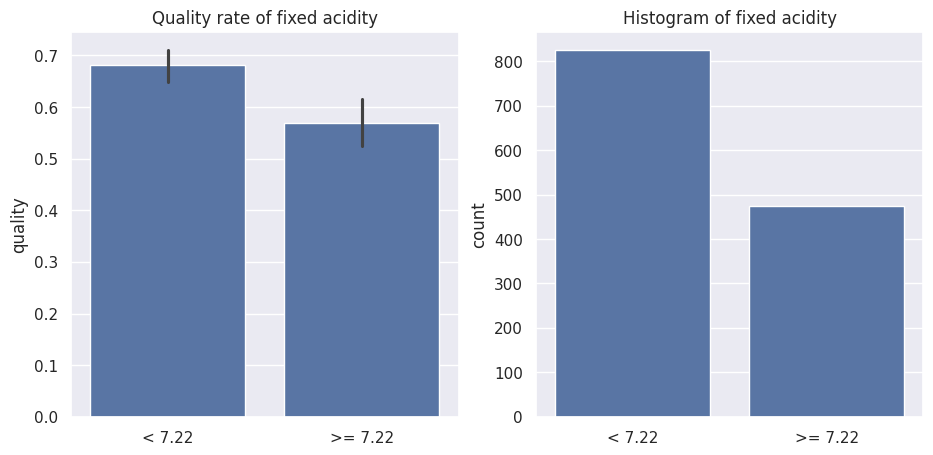

In [55]:
#Keep cell

import seaborn as sns

mean_fixed_acidity = np.where(test_set['fixed acidity'] < 7.22, '< 7.22', '>= 7.22')

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=test_set, y="quality", x=mean_fixed_acidity, ax=axs[0]).set(title="Quality rate of fixed acidity")
sns.countplot(data=test_set, x=mean_fixed_acidity, ax=axs[1]).set(title="Histogram of fixed acidity")

If we split `wine_df` along the mean of fixed acidity, we would have similar quality rates if the split would be the one we are looking for. On the right, however, we can see hat the split would be quite uneven, with about 800+ rows in one group and less than 500 in the other.

We now create a very simple model, which simply says that wines of fixed acidity less than 7.22 are good (which equals to true in our case), while the ones above that value are bad. To do so, we evaluate with our `test_set` to see how accurate this approach turns out to be.

In [56]:
#Keep cell
preds = test_set['fixed acidity'].values < 7.22
preds = preds.astype(int)
preds

array([1, 0, 1, ..., 0, 0, 0])

Let's check this with yet another metrics so that we learn a little more. Mean absolute error (https://en.wikipedia.org/wiki/Mean_absolute_error) measures the absolute error difference between the prediction and the actual value. In our case, the absolute error would be 0 if the predicted value corresponds to the actual one and 1 otherwise.

Complete the next cell.

In [57]:
#Complete cell
#2 pts

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['quality'], preds)

0.41

I am getting something like 0.41, which is not great.

Alternatively, we could try another column. Finish the code below for the same split analysis using the column 'alcohol'.

In [58]:
#Complete cell
#3 pts
mean_alcohol = np.mean(train_set['alcohol'])  # Calculate mean of 'alcohol' column in train_set
preds = (test_set['alcohol'].values < mean_alcohol).astype(int)  # Predictions based on alcohol content
print('Preds: ', preds)  # Print the predictions
print('Mean absolute error: ', mean_absolute_error(test_set['quality'], preds))  # Calculate and print MAE

Preds:  [0 0 1 ... 1 0 1]
Mean absolute error:  0.6738461538461539


This looks worse. Why?

Let's run a quick test that we are doing what we are supposed to be doing.

In [59]:
# Run this cell to test your code...
assert mean_absolute_error(test_set['quality'], preds) > 0.66, f'Test failed'
print('All tests passed!')

All tests passed!


Let's speed things up and try several columns and splits at the same time.

We create a function `score_` to test how a split on a column affects the overall model we want to build. As we want to move slowly towards decision trees, we do not simply split on a column's average but on a measure called impurity (https://en.wikipedia.org/wiki/Decision_tree_learning). Impurity indicates how the two groups that a split creates are similar or dissimilar from each other. The smaller impurity is the better the split. We call these groups `left_group` and `right_group`.

How do we measure group similarity? Similarity is often the big question in data analytics. In this case, we take the standard deviation of the target, which is quality. If you don't remember standard deviation from school, it is basically a measure of the amount of variation of values (https://en.wikipedia.org/wiki/Standard_deviation). Can you see where in the code below?

Standard deviation or `std()` is thus a measure of the spread of two groups. If it is higher, the groups are more dissimilar. Then, we multiply by the number of data items in the groups, because a bigger group has more impact.

We do this twice for both the left and the right split.

In [60]:
#Keep cell
#As a bonus, see whether you can simplify this function.

def score_(y, column, split):
    #Set final score for both groups
    left_group_score = 0
    right_group_score = 0

    # Create left split
    left_group = column < split
    tot = left_group.sum()
    if tot<=1:
        left_group_score = 0
    else:
        left_group_score = y[left_group].std()*tot

    # Create right split
    right_group = column >= split
    tot = right_group.sum()
    if tot<=1:
        right_group_score = 0
    else:
        right_group_score = y[right_group].std()*tot


    return (left_group_score + right_group_score)/len(y)

Run `score_` with mean fixed acidity.

In [61]:
#Keep cell
mean_fixed_acitidy = np.mean(train_set['fixed acidity'])
score_(test_set['fixed acidity'].values, test_set['quality'].values, mean_fixed_acitidy)

1.2499495350759913

Please complete the code below for mean volatile acidity.

In [62]:
#Complete cell
#2 pts

mean_volatile_acitidy = np.mean(train_set['volatile acidity'])
score_(test_set['volatile acidity'].values, test_set['quality'].values, mean_volatile_acitidy)

0.15023640894444493

The scores are close, but fixed acidity seems to be a better split.

Let's play a bit and experience Jupyter notebook's interactive tools (https://jupyterbook.org/en/stable/interactive/interactive.html).

Run the cell below and move the slider for different feature values.

Please, note that we use the min_max scaled version wines_df, as the interaction widget is then between 0 and 1 and easier to move. But the same would apply to `train_set` and `test_set`.

In [63]:
#Keep cell
from ipywidgets import interact
def score__(nm, split):
    col = wines_normalized_df[nm]
    return score_(col, wines_normalized_df['quality'].values, split)


interact(nm=list(wines_normalized_df.columns[:-1]), split=0.5)(score__);

interactive(children=(Dropdown(description='nm', options=('fixed acidity', 'volatile acidity', 'citric acid', …

As you can see, we can now use different values for the splits than the means only. Which ones increase the score and reduce impurity?

Interesting, but also slow and not particularly automated. Let's use the computer to automatically find the best split point for a column.

To find the best splits, we need to first find a number of unique split points. Let's try this for the first column `fixed acidity`. The code uses the `unique()` function from Pandas and then sorts the values with `sorted()`. Check in the documentation what these functions do.

At the end, we print out only the first 15 `unq` values.

In [64]:
#Keep cell
col_ = 'fixed acidity'
unq = train_set[col_].unique()
sorted(unq)[:15]

[3.8, 4.2, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6]

Let's score with these values. Run the cell below and check out what `argmin()` does in the documentation or ask Gemini. It looks for the smallest value and returns its index in a list.

In [65]:
#Keep cell
scores = np.array([score_(train_set[col_], train_set['quality'], o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

6.6

For this column, 6.6 seems to be the best cut-off for the splits.

A typical move in data analysis with Jupyter notebooks is to bring various cells together into one function to run them together. Let's define `min_column` using the previous two cells.

Complete the cell below.

In [66]:
#Complete cell
#2 pts

def min_column(df, col_):
    unq = df[col_].unique()
    s = np.array([score_(df[col_], df['quality'], o) for o in unq if not np.isnan(o)])
    idx = s.argmin()
    return (col_, unq[idx], s[idx])

min_column(train_set, 'fixed acidity')

('fixed acidity', 6.6, 1.3076213389866689)

For all columns, we print out the name of the column, the split value and the impurity - ignoring the last column quality with the index -1.

Complete the next cell.

In [67]:
#Complete cell
#1 pt

for w in list(train_set.columns[:-1]):
    print(min_column(train_set, w))

('fixed acidity', 6.6, 1.3076213389866689)
('volatile acidity', 0.25, 0.15848569733871526)
('citric acid', 0.36, 0.144130989770914)
('residual sugar', 1.0, 4.780572132558901)
('chlorides', 0.045, 0.03294708299411359)
('free sulfur dioxide', 1.0, 17.714587307006358)
('total sulfur dioxide', 180.0, 56.619632465772135)
('density', 0.9958, 0.0028909488679954324)
('pH', 3.08, 0.1610350186225512)
('sulphates', 0.42, 0.15086551777945156)
('alcohol', 9.2, 1.1923454206610198)


According to my output, density <= 0.99 is the best split we can use. Why? Because it has the smallest value of impurity.

We have (almost) re-invented the OneR machine-learning algorithms (https://rasbt.github.io/mlxtend/user_guide/classifier/OneRClassifier/ or https://christophm.github.io/interpretable-ml-book/rules.html). It's not very popular anymore but was very much used in the 1990s. It often provides a great baseline to compare more advanced models with. We can think of OneR and what we have done as a one-rule tree.

How about we add another split after the first one with density? We first pick the best split for density and then find the best split for each of the two subgroups this split produces. To this end, we just have to repeat the previous step for each of the two groups based on a split of density <= 0.99.

Let's do this split first by running the next cell.

In [68]:
#Keep cell
left_split_density = train_set.loc[train_set['density'] <= 0.99, :]
right_split_density = train_set.loc[train_set['density'] > 0.99, :]

Let's repeat the previous step first for left_split_density.

To this end, we have to remove both the 'quality' and the 'density', as we do not want to split over density again and do not need the target column.

Run the cell below.

In [69]:
#Keep cell
left_split_density_columns = [c for c in left_split_density.columns if c not in ['density', 'quality']]

for w in left_split_density_columns:
    print(min_column(left_split_density, w))

('fixed acidity', 7.1, 0.6818453734060683)
('volatile acidity', 0.34, 0.10161867034764957)
('citric acid', 0.49, 0.08585640135522703)
('residual sugar', 1.0, 1.1152057657721097)
('chlorides', 0.027, 0.011505137693355679)
('free sulfur dioxide', 26.0, 13.07702991025913)
('total sulfur dioxide', 126.0, 26.494399212178102)
('pH', 3.3, 0.1433919811340304)
('sulphates', 0.33, 0.12740891382667363)
('alcohol', 12.2, 0.5973160240260135)


The best next split would be with chlorides.

Now, repeat the same for right_split_density.

Complete the next cell.

In [70]:
#Complete cell
#2 pts
right_split_density_columns = [c for c in train_set.columns if c not in ['density', 'quality']]

for w in list(right_split_density_columns):
    print(min_column(right_split_density, w))

('fixed acidity', 6.6, 1.3096554725488478)
('volatile acidity', 0.25, 0.1615001896587181)
('citric acid', 0.36, 0.1470025617104039)
('residual sugar', 8.1, 4.8467403026783655)
('chlorides', 0.045, 0.03353771494199612)
('free sulfur dioxide', 1.0, 17.977443762726235)
('total sulfur dioxide', 180.0, 57.87236576851003)
('pH', 3.08, 0.16203897198930783)
('sulphates', 0.42, 0.15079427069447923)
('alcohol', 9.2, 1.0925997444885562)


What would be the next best split from the existing right split?

The best split would be 'chlorides', too. And we could continue this for the four subsubgroups we have now and then repeat again and again the splits and build a decision tree.

Let's run a test that we got everything right up to now.

In [71]:
# Run this cell to test your code...
assert min_column(right_split_density, 'citric acid')[1]>0.13, f'Test failed'
print('All tests passed!')

All tests passed!



By increasingly adding these splits, we have created a decision tree. The model will start with the density-content of the wines and then add additional spilts or rules until there are no more better splits.

We do not want to do this now and rather use sklearn's `DecisionTreeClassifier` to do it for us.

### Sklearn's Decision Trees (15 points)

For sklearn's decision trees, we need to create `X_train`, `y_train`, etc.

Complete the next cell.

In [72]:
#Complete cell
#3 pts

X_train = train_set.loc[:, train_set.columns != 'quality'].values
y_train = train_set['quality'].values

X_test = test_set.loc[:, test_set.columns != 'quality'].values
y_test = test_set['quality'].values

Complete the code below to set up the model.

Tip: `max_leaf_nodes=4` limits the size of the tree.

In [73]:
#Complete cell
#3 pts

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_leaf_nodes=20).fit(X_train, y_train)

Draw the resulting tree for X_train. Before running this cell you might have to install graphviz on your system - if you are not on Colab: https://www.graphviz.org/download/.

Run the cell below.

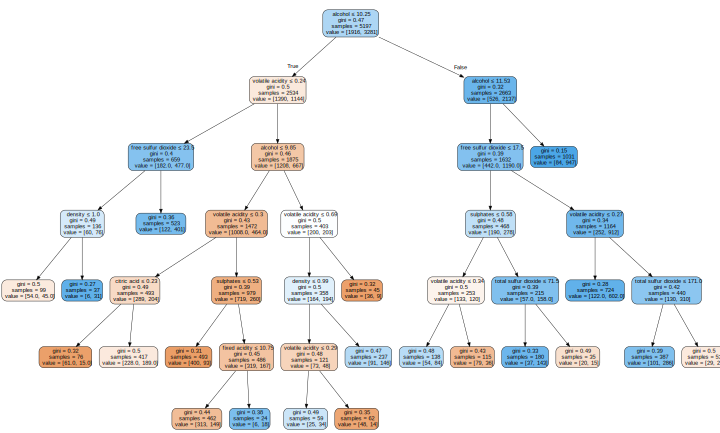

In [74]:
#Keep cell
import graphviz, re
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s = export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True, special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

draw_tree(model, train_set.iloc[:,:-1], size=10)

These are different splits to the ones we found, but sklearn also uses a different impurity measure from our simple one. It uses the 'gini' impurity measure.

Each node contains information about the number of 'samples' or rows in the dataset that match the split. It shows as 'values' how many of these samples have as values 'bad' or 'good' quality.

But what is 'gini'? It is just another measure of impurity - very similar to our own home-made score. It is defined as follows:

In [75]:
#Keep cell
def gini(dataset, cond):
    act = dataset.loc[cond, 'quality']
    return (1 - act.mean()**2 - (1-act).mean()**2)

This calculates the probability that, if you pick two rows from a group, you will get the same wine quality. If the group is all the same, the probability is 1.0, and 0.0 if they're all different. So, in this case the higher the outcome the better the split.

Let us try this for alcohol.

In [76]:
#Keep cell
gini(train_set, train_set['alcohol'] <= 10.25), gini(train_set, train_set['alcohol'] > 10.25)

(0.49528776438385863, 0.31701362561655966)

`train_set['alcohol'] <= 10.25` is the better split with the higher gini value. This corresponds to the gini values in the above visualisation.

Gini can be a bit complicated at first. So, as long as you remember that it is about impurities of the subgroups, you will be fine. It is often the default way of repeatedly splitting a decision tree as in our own example. So, you can just use it out of the box and don't need to change anything. But you need to always know a little bit about these measures - at least whether a higher or a lower value indicates a better split.

Let us see how how decision tree compares with our own model.

Complete the cell below.

In [77]:
#Complete cell
#2 pts

preds = model.predict(X_test)
mean_absolute_error(y_test, preds)

0.24384615384615385

It is already better than the average density model above, which had a worse error.

We can do even better if make the decision tree deeper. You might have noticed that our original sklearn decision tree had a parameter of `max_leaf_nodes=4`, which says we only want 4 leaf nodes. With `min_samples_leaf=25`, we can increase the size of the tree. These are the minimum number of samples required to be at a leaf node. Check out https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

Run the cell below.

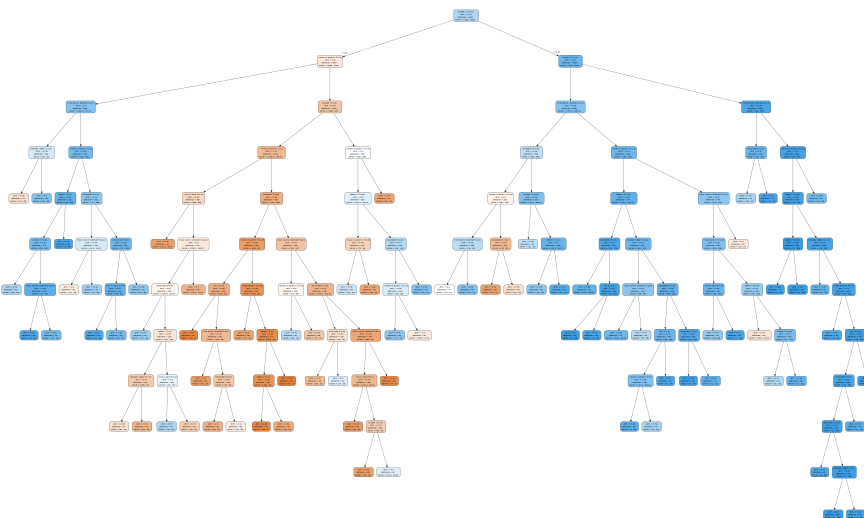

In [78]:
#Keep cell
model_2 = DecisionTreeClassifier(min_samples_leaf=50)
model_2.fit(X_train, y_train)
draw_tree(model_2, train_set.iloc[:,:-1], size=12)

This looks impressively complex. Let us check out how the model does.

Complete the next cell to run an evaluation.

In [79]:
#Complete cell
#2 pts

preds = model_2.predict(X_test)
mean_absolute_error(y_test, preds)

0.24615384615384617

A bit better, but does this justify the complexity? This is a judgement we have to make.

Let's finally ask Gemini to create a training and test dataset for `wines_df` with a train/test split of 0.2. Then, make a decision tree model and evaluate it with the mean absolute error.

In [80]:
#5 pts
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
train_set, test_set = train_test_split(wines_df, test_size=0.2, random_state=42)

# Separate features (X) and target (y)
X_train = train_set.drop('quality', axis=1)  # Features for training
y_train = train_set['quality']  # Target variable for training
X_test = test_set.drop('quality', axis=1)  # Features for testing
y_test = test_set['quality']  # Target variable for testing

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
preds = model.predict(X_test)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, preds)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.20846153846153845


Nice. This is what Gemini, GPT, etc, are really good at.

Let's try something else and introduce the algorithm RandomForest, which is still used for state-of-the-art modelling of structured data.

### Random Forest (10 points)

We do not really want to make the decision trees much more complex than what we have just seen.

So, how can we go further from here? One idea was developed decades ago by Leo Breiman who suggested to create lots of trees and take the average of their predictions (Breiman, L. Random Forests. Machine Learning 45, 5-32 (2001). https://doi.org/10.1023/A:1010933404324).

Taking the average like this, is also known as 'bagging' and can be done with many different models. For this so-called 'ensemble' of decision trees (https://en.wikipedia.org/wiki/Ensemble_learning), we have a particular name and call it RandomForest.

The idea is to create random subsets from our data `wines_df` and create uncorrelated models out of them. Using the average of these models' results, we should get a better estimation of the target value.

The following will create a decision tree from a random subset of the training data and repeats this for 100 trees, determing the average mean absolute error.

Run the two cells below.

In [81]:
#Keep cell
from numpy import random

X_train = train_set.loc[:, train_set.columns != 'quality'].values
y_train = train_set['quality'].values

X_test = test_set.loc[:, test_set.columns != 'quality'].values
y_test = test_set['quality'].values

def get_tree_model(prop=0.75):
    n = len(y_train)
    #ids are random choice of numbers
    ids = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(X_train[ids], y_train[ids])

In [82]:
#Keep cell

#Get 100 decision tree models
tree_models = []
for t in range(100): #create 100 trees
    tree_models.append(get_tree_model())

all_probs = []
for tm in tree_models:
    all_probs.append(tm.predict(X_test))

#Calculate the average predictin for each row by taking the mean
avg_probs = np.array(all_probs).mean(0)

mean_absolute_error(y_test, avg_probs)

0.27199999999999996

This is actually worse than the single decision tree model, which shows that we were probably a bit 'lucky'  with the test data, which fitted the model better than the average model.

What we have just created, is done better with sklearn's RandomForestClassifier, which follows the same principles but better. RandomForestClassifier offers some extra tricks such as picking a random subset of columns for each split.

Let us create everything in one go with sklearn. Complete the following code by using the sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In [83]:
#Complete cell
#4 pts

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)
mean_absolute_error(y_test, rf.predict(X_test))

0.18076923076923077

This is significantly better and better than at least my neural net from the lecture. As you can see it is hard to beat an algorithm from 2001 for structured data analysis.

One more test.

In [84]:
# Run this cell to test your code...
cond_ = pd.Series(rf.feature_importances_, index=train_set.columns[:-1]).sort_values()[-1:].index.values[0]=='alcohol'
assert cond_, f'Test failed'
print('All tests passed!')

All tests passed!


Another nice aspect of random forests is they can tell us which inputs are most important for the predictions, using `feature_importances_`.

Let's try to re-implement the example https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html. We ignore the standard derivation discussion.

Complete the cell below.

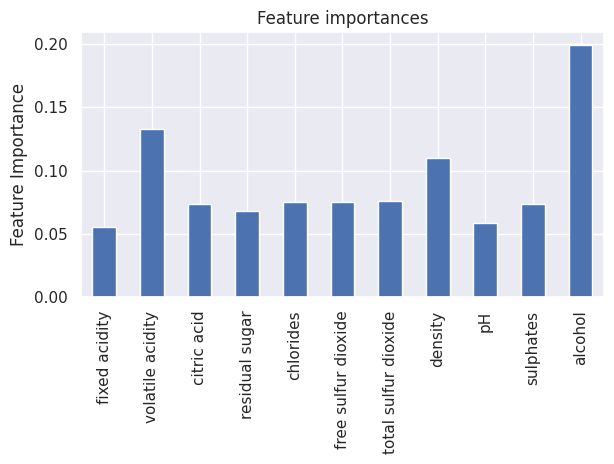

In [85]:
#Complete cell
#2 pts

import pandas as pd

forest_importances = pd.Series(rf.feature_importances_, index=train_set.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance")
fig.tight_layout()
plt.show()

Alcohol, volatile acidity and density are the three most important features.

And of course, Gemini can also do everything we have done. Ask Gemini to "Create training and test dataset for `wines_df` with a test split of 0.2. Then, make a random forest model and evaluate it with the mean absolute error. Finally, visualise the feature importance."

Mean Absolute Error: 0.18076923076923077


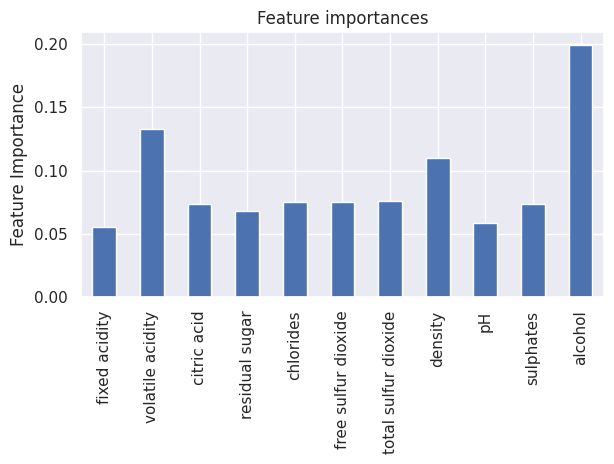

In [86]:
#4 pts

# 1. Create training and test datasets
train_set, test_set = train_test_split(wines_df, test_size=0.2, random_state=42)
X_train = train_set.drop('quality', axis=1)
y_train = train_set['quality']
X_test = test_set.drop('quality', axis=1)
y_test = test_set['quality']

# 2. Build a Random Forest model
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# 3. Evaluate the model
preds = rf.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"Mean Absolute Error: {mae}")

# 4. Visualize feature importance
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Importance")
fig.tight_layout()
plt.show()

Impressive! Why not practice more now at https://www.w3schools.com/python/python_ml_decision_tree.asp?

By understanding the principles of decision trees and random forests, you have a great option to analyse most structured data. I am proud of you.

That's it for machine learning 101! That was not too hard, was it?